In [2]:
import mat73
import numpy as np
import matplotlib.pyplot as plt
import scipy
import scipy.io as sio
import pandas as pd
from skimage import metrics

C:\Users\joeol\anaconda3\lib\site-packages\scipy\__init__.py:138: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.3)
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion} is required for this version of "


In [3]:
mri = sio.loadmat(r'Models/BiggerDatasetDeeper/CCW1/CCW1_processed.mat')['recon2']
data = sio.loadmat(r'Models/BiggerDatasetDeeper/CCW1/CCW1_processed.mat')
unet = data['recon2']
smoothed = data['smooth_images']
unsmoothed = data['noisy_images']

With MRI used as the optimal measurement the rest of the metrics are calculated based on that being ground truth

In [4]:
df = pd.DataFrame(columns=['unet_mse', 'unet_ssim', 'smoothed_mse', 'smoothed_ssim', 'unsmoothed_mse', 'unsmoothed_ssim'])
df

,unet_mse,unet_ssim,smoothed_mse,smoothed_ssim,unsmoothed_mse,unsmoothed_ssim


In [5]:
def mse(input, target):
    """
    returns the array of the mean squared error of the input vs target
    :param input: array
    :param target: array
    :return: 
    """
    return np.sum(np.subtract(input, target) ** 2, axis=tuple([0, 1, 2]))

def ssim(input, target):
    """
    return the array of SSIM of the input vs target
    :param input: 
    :param target: 
    :return: 
    """
    ssim = []
    for i in range(input.shape[-1]):
        ssim.append(metrics.structural_similarity(input[:,:,:,i], target[:,:,:,i]))
    return np.array(ssim)

In [6]:
df['smoothed_mse'] = mse(smoothed, mri) 
df['smoothed_ssim'] = ssim(smoothed, mri)
df['unsmoothed_mse'] = mse(unsmoothed, unet)
df['unsmoothed_ssim'] = ssim(unsmoothed, unet)
df['unet_mse'] = mse(unet, unet)
df['unet_ssim'] = ssim(unet, unet)

<ipython-input-5-7e476c3d8d13>:19: UserWarning: Inputs have mismatched dtype.  Setting data_range based on im1.dtype.
  ssim.append(metrics.structural_similarity(input[:,:,:,i], target[:,:,:,i]))


In [7]:
df.head()

,unet_mse,unet_ssim,smoothed_mse,smoothed_ssim,unsmoothed_mse,unsmoothed_ssim
0,0.0,1.0,309817.136989,0.552972,392326.236460,0.590267
1,0.0,1.0,266650.500599,0.549160,329272.180911,0.590641
2,0.0,1.0,242116.112954,0.560539,297373.570518,0.599917
3,0.0,1.0,255678.703391,0.549341,324261.224764,0.590034
4,0.0,1.0,241170.605225,0.548692,316700.787912,0.592653


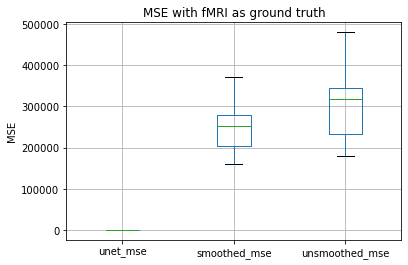

In [23]:
plt.figure()
df.boxplot(column=['unet_mse', 'smoothed_mse', 'unsmoothed_mse'])
plt.ylabel('MSE')
plt.title('MSE with fMRI as ground truth')
plt.show()

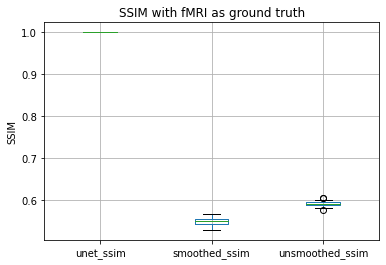

In [22]:
plt.figure()
df.boxplot(column=['unet_ssim', 'smoothed_ssim', 'unsmoothed_ssim'])
plt.ylabel('SSIM')
plt.title('SSIM with fMRI as ground truth')
plt.show()

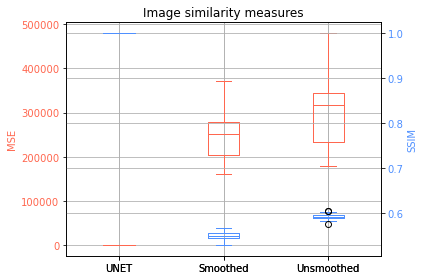

In [38]:
fig, ax1 = plt.subplots()

colour1 = '#FF674F'
ax1.set_title('Image similarity measures')
#ax1.set_xlabel('MSE')
df.boxplot(column=['unet_mse', 'smoothed_mse', 'unsmoothed_mse'], color=colour1)
ax1.tick_params(axis='y', labelcolor=colour1)
ax1.set_ylabel('MSE', color=colour1)

ax2 = ax1.twinx()
colour2 = '#4F90FF'
df.boxplot(column=['unet_ssim', 'smoothed_ssim', 'unsmoothed_ssim'], color=colour2)
ax2.set_ylabel('SSIM', color=colour2)
ax2.tick_params(axis='y', labelcolor=colour2)
ax2.set_xticklabels(['','','', 'UNET', 'Smoothed', 'Unsmoothed'])
fig.tight_layout()
plt.savefig('Image Similarity Measures.pdf', bbox_inches='tight', dpi=300)
plt.show()